In [1]:
# Import libraries
import pandas as pd
import numpy as np

In [2]:
# Read data
data = pd.read_csv('zoo.csv')
data.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [3]:
# Get information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal_name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  class_type   101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [4]:
# Extract the unique number of high-level classes
labels = data['class_type']
print(np.unique(labels.values))

[1 2 3 4 5 6 7]


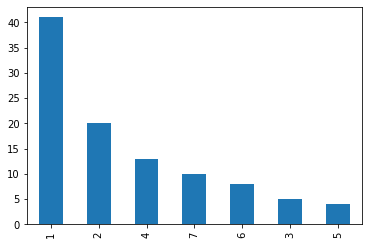

In [5]:
# Plot the unique number of labels
from matplotlib import pyplot as plt
%matplotlib inline

fig,ax = plt.subplots()
(labels.value_counts()).plot(ax=ax,kind='bar')

# returns 7 unique class labels --> clustering should be performed

In [7]:
data.values[:,1:-1]

array([[1, 0, 0, ..., 0, 0, 1],
       [1, 0, 0, ..., 1, 0, 1],
       [0, 0, 1, ..., 1, 0, 0],
       ...,
       [1, 0, 0, ..., 1, 0, 1],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 1, 1, ..., 1, 0, 0]], dtype=object)

In [8]:
# Extract features and classes into separate variables
features = data.values[:,1:-1]
classes = data.values[:,-1]
print("Feature variable shape:", features.shape)

Feature variable shape: (101, 16)


In [9]:
# Import libraries for clustering
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import pairwise_distances

# Perform Clustering 
model = AgglomerativeClustering(n_clusters=7, linkage='average', affinity='cosine') # n_clusters=7 since there are 7 unique class labels, affinity = similarity method

# Fit the model over the feature variable
model.fit(features)

# Extract the labels predicted against the features
model.labels_

array([0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 6, 0, 0, 0, 0, 1, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 4, 0, 0, 0,
       2, 0, 0, 0, 0, 0, 0, 1, 2, 0, 1, 5, 0, 0, 4, 3, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 3, 0])

In [10]:
# Get unique values of labels
print(np.unique(model.labels_))

[0 1 2 3 4 5 6]


In [11]:
# Subtract 1 to labels to match print(np.unique(model.labels_))
labels=labels-1

In [12]:
# Estimate the RMSE as a model performance measure 
from sklearn.metrics import mean_squared_error
score = mean_squared_error(labels, model.labels_)

# Evaluate the absolute error
print("RMSE:", np.sqrt(score))

RMSE: 2.4373333911071624
